In [2]:
!git clone https://github.com/roneysco/Fake.br-Corpus.git

Cloning into 'Fake.br-Corpus'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 28750 (delta 1), reused 0 (delta 0), pack-reused 28744
Receiving objects: 100% (28750/28750), 16.65 MiB | 7.40 MiB/s, done.
Resolving deltas: 100% (14126/14126), done.
Checking out files: 100% (21601/21601), done.


In [3]:
!ls Fake.br-Corpus/full_texts/

fake  fake-meta-information  true  true-meta-information


In [0]:
import glob
import pandas as pd

In [5]:
allfakes = glob.glob('Fake.br-Corpus/size_normalized_texts/fake/*')
allfakes = sorted(allfakes)
allfakes[:10]

['Fake.br-Corpus/size_normalized_texts/fake/1.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/10.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/100.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1000.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1001.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1002.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1003.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1004.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1005.txt',
 'Fake.br-Corpus/size_normalized_texts/fake/1006.txt']

In [6]:
fake = []
length = len(allfakes)
for i in range(length):
  file = open(allfakes[i], mode='r', encoding='utf-8')
  text = file.read().strip()
  file.close()
  fake.append(text)

len(fake)

3600

In [7]:
fake[1]

'Dr. Ray peita Bolsonaro, chama-o de “conservador fake” em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso mais convincente para aquela boa parte dos liberais e conservadores do Brasil que querem se ver livres das amarras estatais.\n\nTudo bem que as pesquisas ainda dizem que a maior parte do povo é contra as privatizações, mas o índice (pouco mais de 50% do povo) é fácil de ser revertido. Ademais, Bolsonaro deveria falar para direitistas em vez de focar tanto em petistas arrependidos.\n\nRecentemente ele disse que “pensaria 200 vezes antes de privatizar a Petrobrás para que ela não caia nas mãos de chineses” (ou algo do tipo). Deveria ter dito: “Eu garanto a privatização da Petrobrás, e também garanto que chineses não irão comprá-la”. Isso não deixaria brechas. Do jeito que ele falou, parece que o suposto “medo de venda aos chineses” é pretexto para evitar a privatização.\n\

In [8]:
fakenews = pd.DataFrame(fake)
fakenews.columns = ['texto']
fakenews['classe'] = 0
fakenews.head()

,texto,classe
0,Kátia Abreu diz que vai colocar sua expulsão e...,0
1,"Dr. Ray peita Bolsonaro, chama-o de “conservad...",0
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,0
3,Relatório assustador do BNDES mostra dinheiro ...,0
4,"Radialista americano fala sobre o PT: ""Eles ve...",0


In [9]:
alltrues = glob.glob('Fake.br-Corpus/size_normalized_texts/true/*')
alltrues = sorted(alltrues)
alltrues[:10]

['Fake.br-Corpus/size_normalized_texts/true/1.txt',
 'Fake.br-Corpus/size_normalized_texts/true/10.txt',
 'Fake.br-Corpus/size_normalized_texts/true/100.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1000.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1001.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1002.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1003.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1004.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1005.txt',
 'Fake.br-Corpus/size_normalized_texts/true/1006.txt']

In [10]:
true = []
length = len(alltrues)
for i in range(length):
  file = open(alltrues[i], mode='r', encoding='utf-8')
  text = file.read().strip()
  file.close()
  true.append(text)

len(true)

3600

In [11]:
truenews = pd.DataFrame(true)
truenews.columns = ['texto']
truenews['classe'] = 1
truenews.head()

,texto,classe
0,O Podemos decidiu expulsar o deputado federal...,1
1,"Bolsonaro é um liberal completo, diz president...",1
2,Ministro do STF libera Andrea Neves de prisão ...,1
3,"Apesar da abundância, cresce preocupação com p...",1
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",1


In [12]:
dfs = [fakenews, truenews]
allnews = pd.concat(dfs)
allnews.head()

,texto,classe
0,Kátia Abreu diz que vai colocar sua expulsão e...,0
1,"Dr. Ray peita Bolsonaro, chama-o de “conservad...",0
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,0
3,Relatório assustador do BNDES mostra dinheiro ...,0
4,"Radialista americano fala sobre o PT: ""Eles ve...",0


In [13]:
print(len(allnews))
allnews.tail()

7200


,texto,classe
3595,"Para jornal britânico, ação contra Lula na Lav...",1
3596,Temer diz que acionou PF e Cade para investiga...,1
3597,Os obstáculos políticos de Temer em 2017. Espe...,1
3598,"Sexta-feira, 15 de setembro de 2017. Boa noite...",1
3599,"'Não me envolvo em política', diz brasileiro q...",1


In [14]:
# Criando duas novas features, para contagem de texto e contagem de sinais de pontuação

import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

allnews['tamanho'] = allnews['texto'].apply(lambda x: len(x))
allnews['prop_pont'] = allnews['texto'].apply(lambda x: count_punct(x))
allnews.head()

,texto,classe,tamanho,prop_pont
0,Kátia Abreu diz que vai colocar sua expulsão e...,0,835,3.6
1,"Dr. Ray peita Bolsonaro, chama-o de “conservad...",0,1506,2.7
2,Reinaldo Azevedo desmascarado pela Polícia Fed...,0,1658,1.9
3,Relatório assustador do BNDES mostra dinheiro ...,0,3768,2.3
4,"Radialista americano fala sobre o PT: ""Eles ve...",0,666,5.5


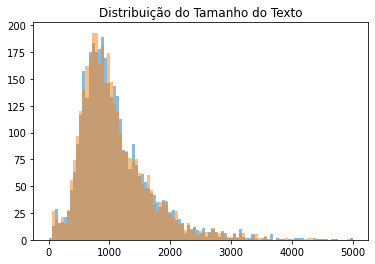

In [15]:
# Comparando distribuições de tamanho do texto
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0, 5000, 100)
pyplot.hist(allnews[allnews['classe']==1]['tamanho'], bins, alpha=0.5, label='true')
pyplot.hist(allnews[allnews['classe']==0]['tamanho'], bins, alpha=0.5, label='fake')
pyplot.title("Distribuição do Tamanho do Texto")
pyplot.show()

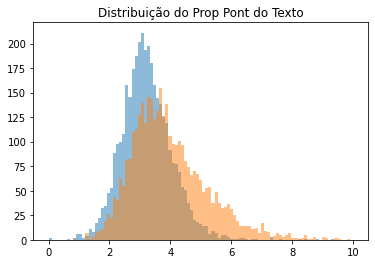

In [16]:
# Comparando distribuições de tamanho do texto
from matplotlib import pyplot
import numpy as np
%matplotlib inline
bins = np.linspace(0, 10, 100)
pyplot.hist(allnews[allnews['classe']==1]['prop_pont'], bins, alpha=0.5, label='true')
pyplot.hist(allnews[allnews['classe']==0]['prop_pont'], bins, alpha=0.5, label='fake')
pyplot.title("Distribuição do Prop Pont do Texto")
pyplot.show()

In [17]:
# Criando feature binária acerca da presença de depoimentos aspeados
pd.set_option('display.max_colwidth',1000)
type(allnews['texto'][0])

pandas.core.series.Series

In [0]:
####################
####################
####################
# TESTANDO O SPACY #
####################
####################
####################

In [19]:
# Testando o Spacy

textoteste = allnews['texto'][1].to_string()

# Import the Portuguese language class
from spacy.lang.pt import Portuguese
# Create the nlp object
nlp = Portuguese()
# Created by processing a string of text with the nlp object
doc = nlp(textoteste)
# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

1
   
Dr.
Ray
peita
Bolsonaro
,
chama-o
de
“
conservador
fake
”
em
entrevista
a
Danilo
Gentili
e
divide
a
direita.\n\nEste
site
vem
avisando
Jair
Bolsonaro
que
ele
deveria
abandonar
a
pauta
estatista
de
vez
e
fazer
um
discurso
mais
convincente
para
aquela
boa
parte
dos
liberais
e
conservadores
do
Brasil
que
querem
se
ver
livres
das
amarras
estatais.\n\nTudo
bem
que
as
pesquisas
ainda
dizem
que
a
maior
parte
do
povo
é
contra
as
privatizações
,
mas
o
índice
(
pouco
mais
de
50
%
do
povo
)
é
fácil
de
ser
revertido
.
Ademais
,
Bolsonaro
deveria
falar
para
direitistas
em
vez
de
focar
tanto
em
petistas
arrependidos.\n\nRecentemente
ele
disse
que
“
pensaria
200
vezes
antes
de
privatizar
a
Petrobrás
para
que
ela
não
caia
nas
mãos
de
chineses
”
(
ou
algo
do
tipo
)
.
Deveria
ter
dito
:
“
Eu
garanto
a
privatização
da
Petrobrás
,
e
também
garanto
que
chineses
não
irão
comprá-la
”
.
Isso
não
deixaria
brechas
.
Do
jeito
que
ele
falou
,
parece
que
o
suposto
“
medo
de
venda
a
os
chineses
”
é
pretexto
p

In [20]:
# Index into the Doc to get a slice of it (span object)
span = doc[:40]

# Get the token text via the .text attribute
print(span.text)

1    Dr. Ray peita Bolsonaro, chama-o de “conservador fake” em entrevista a Danilo Gentili e divide a direita.\n\nEste site vem avisando Jair Bolsonaro que ele deveria abandonar a pauta estatista de vez e fazer um discurso


In [21]:
# Different Lexical Attributes

print("Index:   ", [token.i for token in span])
print("Text:    ", [token.text for token in span])
print("is_alpha:", [token.is_alpha for token in span])
print("is_punct:", [token.is_punct for token in span])
print("like_num:", [token.like_num for token in span])

Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Text:     ['1', '   ', 'Dr.', 'Ray', 'peita', 'Bolsonaro', ',', 'chama-o', 'de', '“', 'conservador', 'fake', '”', 'em', 'entrevista', 'a', 'Danilo', 'Gentili', 'e', 'divide', 'a', 'direita.\\n\\nEste', 'site', 'vem', 'avisando', 'Jair', 'Bolsonaro', 'que', 'ele', 'deveria', 'abandonar', 'a', 'pauta', 'estatista', 'de', 'vez', 'e', 'fazer', 'um', 'discurso']
is_alpha: [False, False, False, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
is_punct: [False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, Fa

In [22]:
# Rule base matching to find percentage
# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Percentage found:", token.text)

Percentage found: 50


In [24]:
import spacy
# Load the small English model
nlp = spacy.load("pt_core_news_sm")

# Process a text
doc = nlp(textoteste)

pos_tag = []
# Iterate over the tokens
for token in doc:
    pos_tag.append(token.pos_)
# Print the text and the predicted part-of-speech tag
print(pos_tag)

OSError: ignored

In [0]:
textoteste

In [0]:
#####################################
#####################################
#####################################
# FUNCAO PRA APLICAR O ##############
#####################################
#####################################
#####################################

type(textoteste)